In [67]:
import pandas as pd #to load and manioulate data and for one-hot encoding
import numpy as np # to calculate mean and standard deviation
import matplotlib.pyplot as plt #to draw graphs
from sklearn.tree import DecisionTreeClassifier #to build a classification tree
from sklearn.tree import plot_tree #to draw a classification tree
from sklearn.model_selection import train_test_split # to split data into training and testing
from sklearn.model_selection import cross_val_score # for cross validation
from sklearn.metrics import confusion_matrix #create confusion matrix
from sklearn.metrics import plot_confusion_matrix #plot_cobfusion_matrix

In [68]:
#load the file
df = pd.read_csv('/Users/ritika/Github/Heart_disease_decisiontree/processed.cleveland.data', header=None)

In [69]:
# print first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [70]:
#set the column names
df.columns = ['age','sex','cp','restbp','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','hd']

In [71]:
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [72]:
#find data types of each column
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [73]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [74]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

In [75]:
# check no. of rows with '?'
len(df.loc[(df['ca']=='?') | (df['thal']=='?')])

6

In [76]:
# total number of rows
len(df)

303

In [77]:
# remove the rows with '?'
df_no_missing = df.loc[(df['ca']!='?') & (df['thal']!='?')]

In [78]:
len(df_no_missing)

297

In [79]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [80]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [81]:
# Divide the columns into dependent and independent variable
# X is all the columns which are predictors
X = df_no_missing.drop('hd',axis=1).copy()

In [82]:
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [83]:
# y is the dependent variable
y = df_no_missing['hd'].copy()

In [84]:
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

In [86]:
#one-hot encoding for cp, restecg, slop and thal
X_encoded = pd.get_dummies(X, columns =['cp','restecg','slope','thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,ca,cp_1.0,...,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,0.0,1,...,0,0,0,1,0,0,1,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,3.0,0,...,1,0,0,1,0,1,0,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,2.0,0,...,1,0,0,1,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0.0,0,...,0,1,0,0,0,0,1,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0.0,0,...,0,0,0,1,1,0,0,1,0,0


In [87]:
y_not_zero_index = y>0 # get the indices for y > 0. This is to convert the y to 'have heart disease' and 'not have heart disease'

In [88]:
y[y_not_zero_index] = 1 # set those indices to 1

In [89]:
y.unique()

array([0, 1])

In [90]:
#split the data into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state=42)

In [91]:
# create the first decision tree
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(479.8318965517241, 390.7125, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(277.79741379310343, 356.73749999999995, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(169.5646551724138, 322.7625, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(122.66379310344828, 288.78749999999997, 'age <= 58.5\ngini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(72.15517241379311, 254.81249999999997, 'chol <= 311.5\ngini = 0.061\nsamples = 63\nvalue = [61, 2]\nclass = No HD'),
 Text(43.293103448275865, 220.83749999999998, 'restbp <= 109.0\ngini = 0.033\nsamples = 60\nvalue = [59, 1]\nclass = No HD'),
 Text(28.862068965517242, 186.86249999999998, 'sex <= 0.5\ngini = 0.278\nsamples = 6\nvalue = [5, 1]\nclass = No HD'),
 Text(14.431034482758621, 152.8875, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]\nclass = No HD'),
 Text(43.293103448275865, 152.8875, 'exang <= 0.5\ngini = 0.

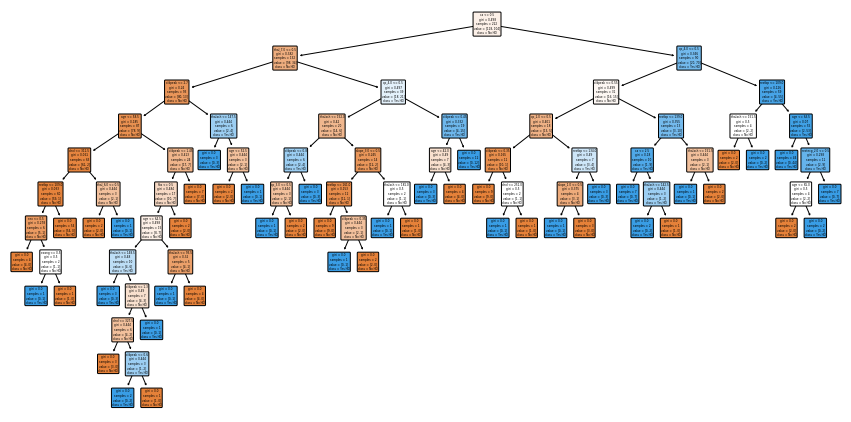

In [92]:
#plot the tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt, filled=True,rounded=True,class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns)

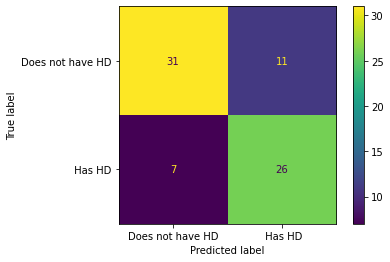

In [93]:
#plot confusion matrix
plot_confusion_matrix(clf_dt,X_test,y_test, display_labels =['Does not have HD', ' Has HD'])

In [94]:
clf_dt

DecisionTreeClassifier(random_state=42)

In [96]:
#cost complexity pruning to prevent over fitting of the data

path = clf_dt.cost_complexity_pruning_path(X_train, y_train) #determine values for alpha
ccp_alphas = path.ccp_alphas #extract different values of alpha
ccp_alphas = ccp_alphas[:-1] # remove the last value

clf_dts=[] #to store the list of decision trees

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)



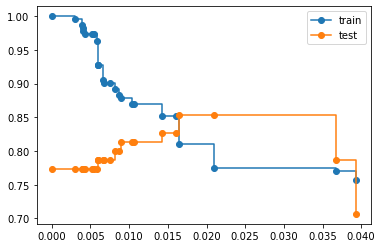

In [115]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]
fig, ax = plt.subplots()
ax.set_xlabel=("alpha")
ax.set_ylabel=("accuracy")
ax.set_title=('Accuracy vs alpha for training and testing dataset')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<AxesSubplot:xlabel='tree'>

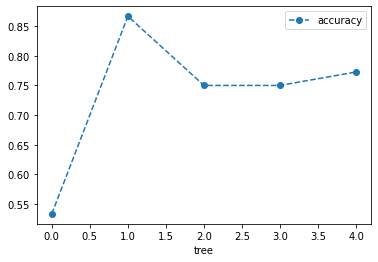

In [116]:
#cross validation for the optima alphas 
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

# use five fold training and testing dataset 
scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
df = pd.DataFrame(data={'tree':range(5),'accuracy':scores})
df.plot(x='tree', y = 'accuracy',marker='o', linestyle='--')

<AxesSubplot:xlabel='alpha'>

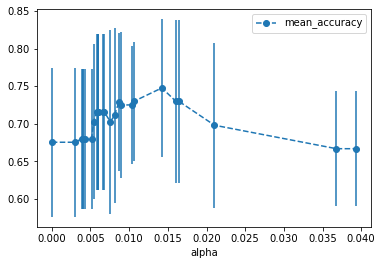

In [120]:
#an array to store results of each validation 
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=5)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

alpha_results = pd.DataFrame(alpha_loop_values, columns=['alpha','mean_accuracy','std'])

alpha_results.plot(x='alpha',y='mean_accuracy',yerr='std',marker='o',linestyle='--')

In [122]:
ideal_ccp_alpha =  alpha_results[(alpha_results['alpha']>0.014) & (alpha_results['alpha']<0.015)]['alpha']
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [123]:
ideal_ccp_alpha=float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

In [ ]:
ccp_alpha=ideal_ccp_alpha

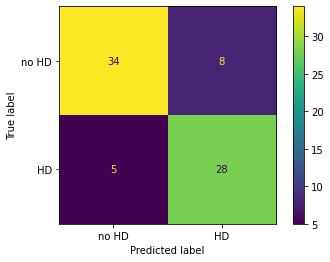

In [127]:
#pruned tree
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned = clf_dt_pruned.fit(X_train, y_train)

# plot confusion matrux

plot_confusion_matrix(clf_dt_pruned,X_test, y_test, display_labels=['no HD', 'HD'])

[Text(482.8846153846154, 356.7375, 'ca <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(257.53846153846155, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(128.76923076923077, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(64.38461538461539, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(193.15384615384616, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(386.3076923076923, 152.8875, 'cp_4.0 <= 0.5\ngini = 0.497\nsamples = 39\nvalue = [18, 21]\nclass = Yes HD'),
 Text(321.9230769230769, 50.96249999999998, 'gini = 0.42\nsamples = 20\nvalue = [14, 6]\nclass = No HD'),
 Text(450.69230769230774, 50.96249999999998, 'gini = 0.332\nsamples = 19\nvalue = [4, 15]\nclass = Yes HD'),
 Text(708.2307692307693, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes H

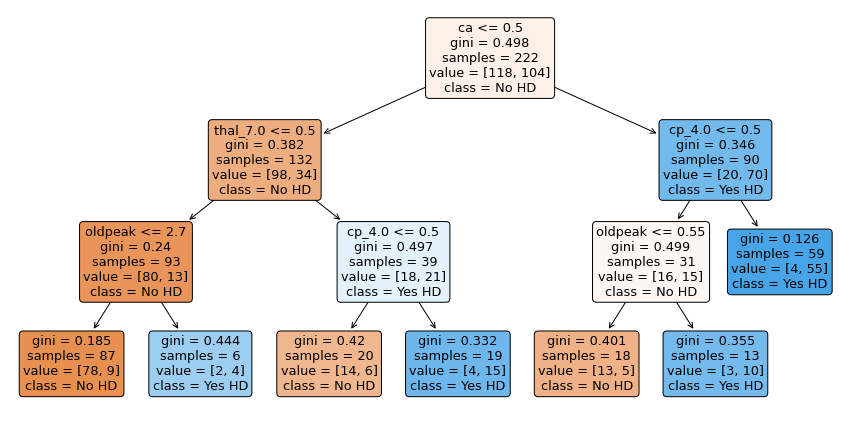

In [128]:
#plot the tree
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, filled=True,rounded=True,class_names=['No HD', 'Yes HD'], feature_names=X_encoded.columns)